<h1 align="center" style="font-variant: small-caps">How to build a genome-scale cell growth model</h1>
<h2 align="center">INTRODUCTION</h2>
<h5 align="center">(<code>Version 15</code>, July 2025)</h5>

<div align="center" style="max-width:250px;display:block;margin:auto;">

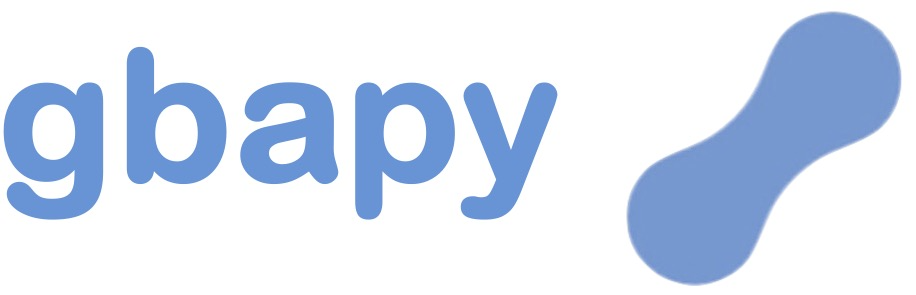

</div>

# Table of content

- [1. The <strong>gbapy</strong> Python module](#gbapy)
- [2. Constructing a genome-scale CGM: how-to](#introduction)
  - [&#x2611; Step 1: Collect data](#introduction_1)
  - [&#x2611; Step 2: Check and correct for inconsistencies in the model](#introduction_2)
  - [&#x2611; Step 3: Edit and compress the model](#introduction_3)
  - [&#x2611; Step 4 Reduce the model to a convex problem](#introduction_4)
  - [&#x2611; Step 5: Build the CGM](#introduction_5)
- [3. Software usage](#software)
- [4. A complete walkthrough tutorial to build a genome-scale CGM](#tutorial)

# 1. The <strong>gbapy</strong> module <a id="gbapy"></a>

<strong>gbapy</strong> is a freely available Python module implementing growth balance analysis (GBA) mathematical formalism (<a src="https://doi.org/10.1371/journal.pcbi.1011156" target="_blank">Dourado et al. 2023</a>).
It is versatile, easy to use, and allows to build and manipulate cell growth models (CGMs) of any size, including genome-scale CGMs.

<strong>gbapy</strong> is freely distributed as a Python module (see https://github.com/charlesrocabert/gbapy for installation instructions and first usage) under the MIT license.

In addition, a C++ framework, <strong>gbacpp</strong> (see https://github.com/charlesrocabert/gbacpp), has been specifically implemented to look for optimal solutions in CGMs, and optimized for genome-scale models, which require heavy calculation. <strong>gbacpp</strong> can be deployed on HPC, and will be integrated to <strong>gbapy</strong> in the near future.

# 2. Constructing a genome-scale CGM: how-to <a id="introduction"></a>

Building a genome-scale CGM usually requires a pre-existing model of the organim of interest. One good start is a pre-published and annotated genome-scale metabolic model (GEM; see <em>e.g.</em> the <a href="http://bigg.ucsd.edu/" target="_blank">BiGG database</a>).

To obtain a functional CGM, it is necessary to check and correct for mass conservation inconsistencies, and to collect an important amount of data to infer metabolite and enzyme molecular masses, as well as kinetic parameters.

A proper annotation, including metabolites, proteins and the enzyme composition, as well as a genome assembly, are also required to extract database identifiers, chemical formulas, nucleotide and amino-acid sequences (<em>e.g.</em> on the <a href="https://www.ncbi.nlm.nih.gov/datasets/genome/" target="_blank">NCBI database</a>).

We provide here a methodology, which can be divided into five main steps (see Figure 1):

<div align="center" style="max-width:1000px;display:block;margin:auto;">

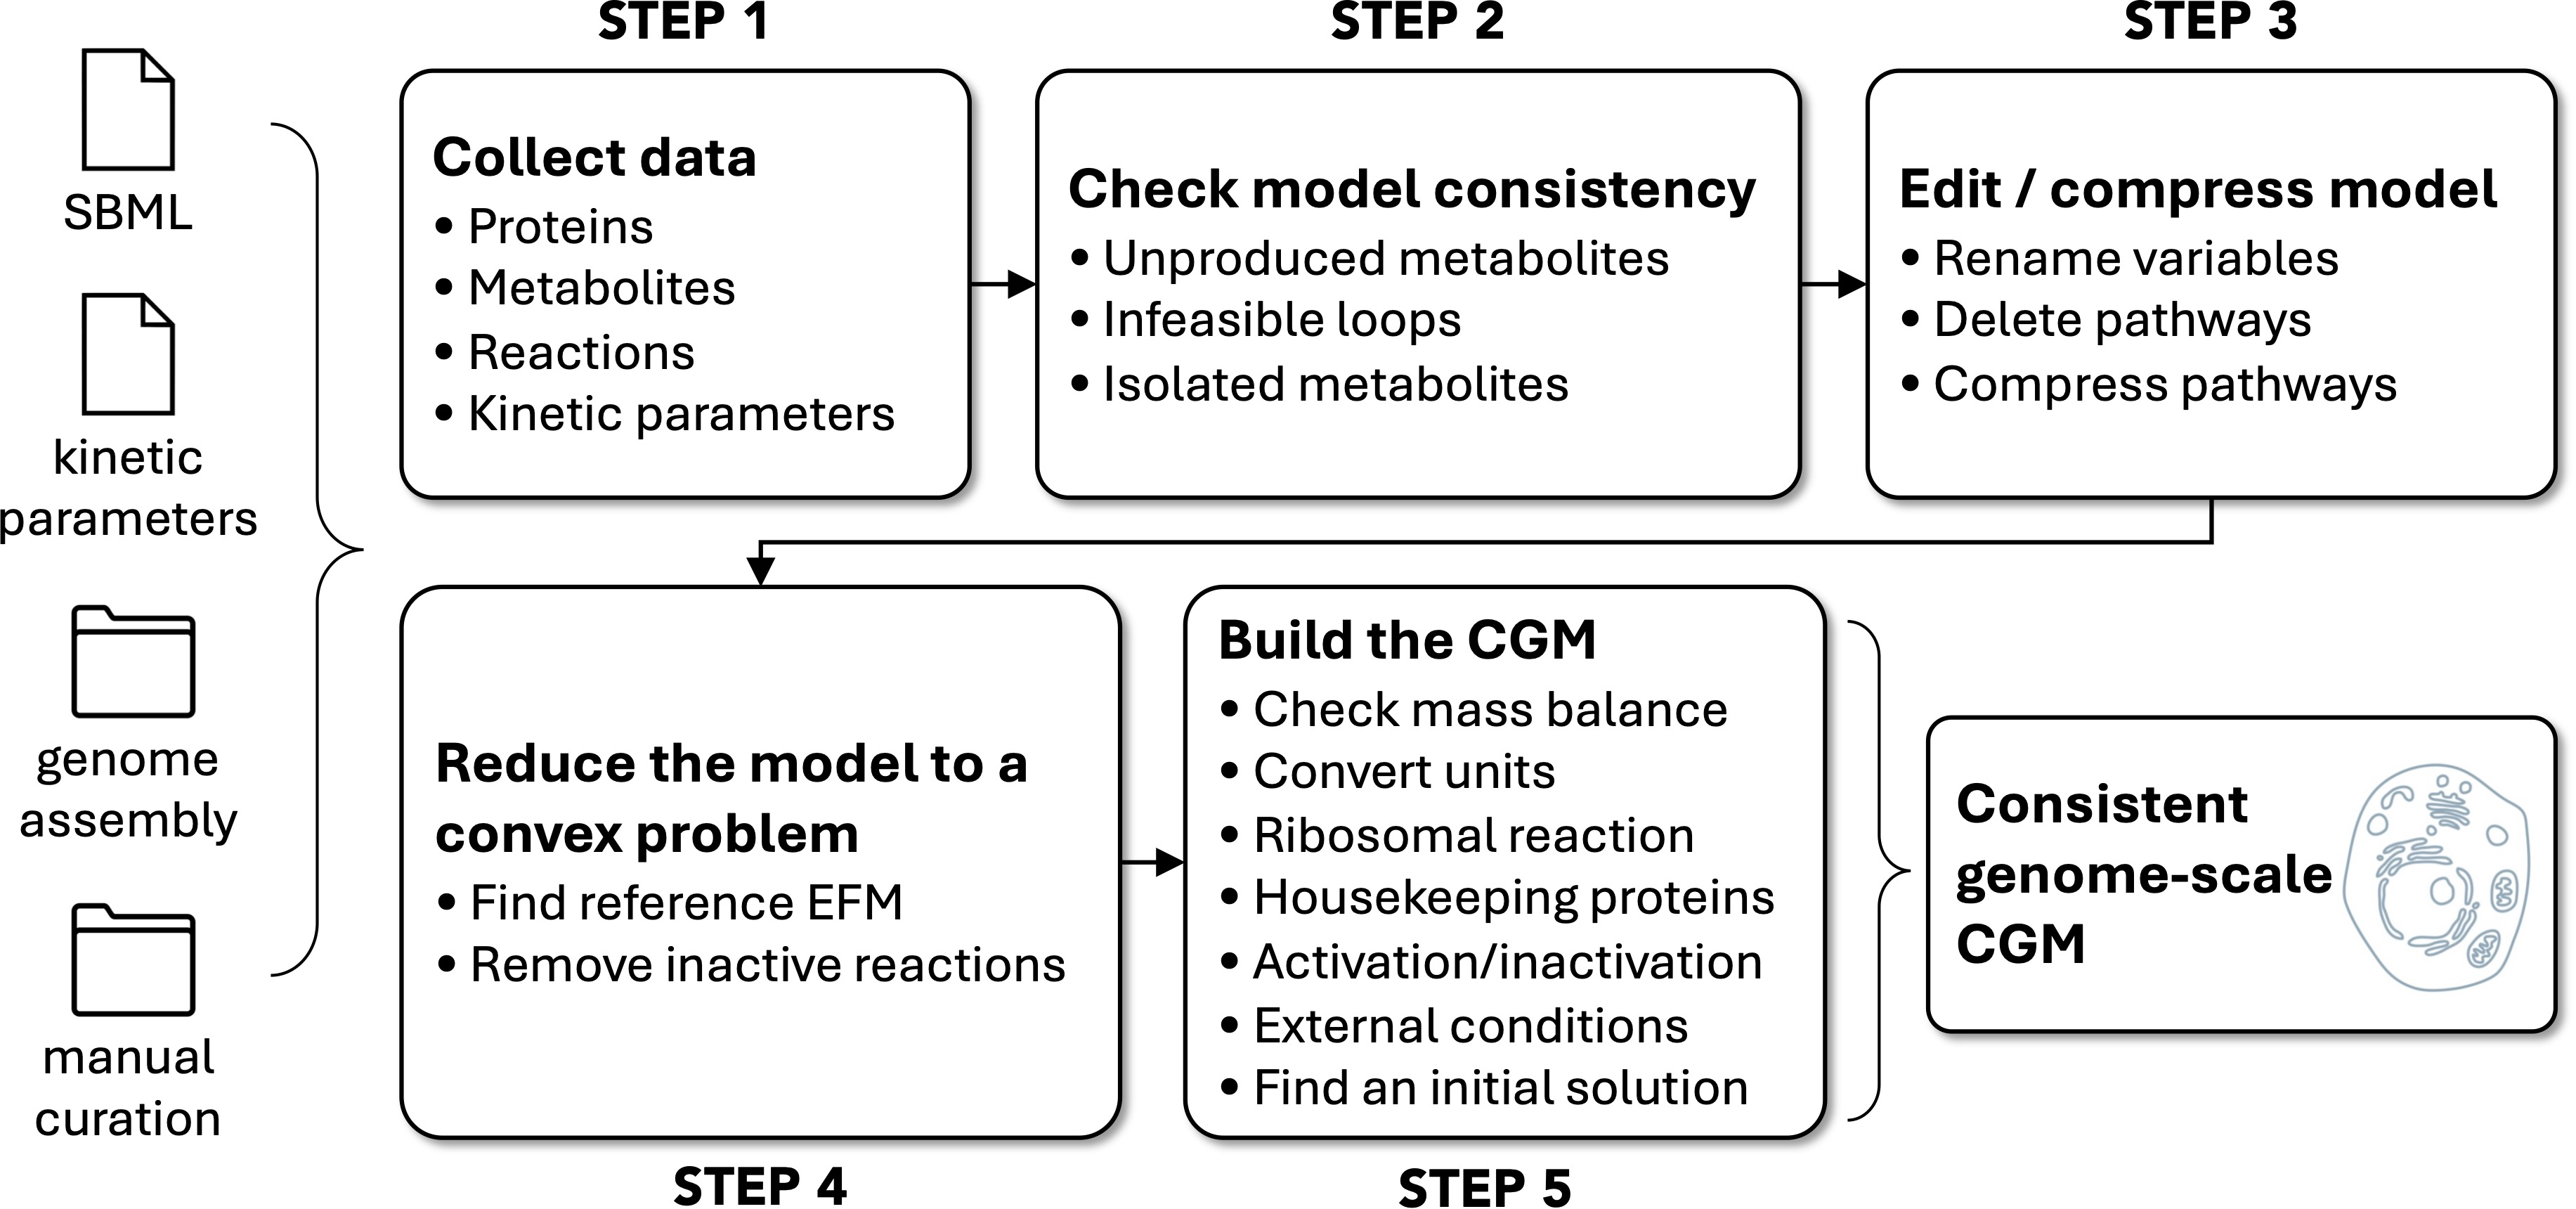

<strong>Figure 1.</strong> The methodology to build a genome-scale CGM is divided into five main steps.

</div>

## &#x2611; Step 1. Collect data <a id="introduction_1"></a>

Collecting various data is mandatory to build a realistic model:

- 1) Collect proteins involved in the model, their amino-acid sequences and calculate their molecular masses. If the protein composition is unknown for one reaction, dummy proteins can be used (<em>e.g.</em> an average enzyme);
- 2) Collect metabolites involved in the model and their annotation. Depending on the nature of the metabolite (DNA, RNA, small molecule, macromolecule, ...), different solutions are necessary to calculate the molecular masses. <strong>gbapy</strong> provides methods for DNA, RNA and chemical formulas without unspecified radicals (`R`). For other molecules, manual curation is necessary;
- 3) Collect reactions, their stoichiometry, as well as their enzyme composition. <strong>gbapy</strong> provides methods to automatically calculate the enzyme's mass;
- 4) Collect kinetic parameters for each reaction (mainly $K_\text{M}$ and $k_\text{cat}$ values). It can also include inhibition/activation interactions. Here are a few well-known databases: <a href="https://www.brenda-enzymes.org/" target="_blank">BRENDA</a>, <a href="http://sabio.h-its.org/" target="_blank">Sabio-RK</a>, or <a href="https://www.uniprot.org/" target="_blank">UniProt</a>. The user can also predict kinetic parameter values using machine-learning solutions (see <em>e.g.</em> <a href="https://esp.cs.hhu.de/" target="_blank">DeepMolecules</a>).

## &#x2611; Step 2. Check and correct for inconsistencies in the model <a id="introduction_2"></a>

Second, the consistency of the model structure must be tested to detect potential errors:

- 1) Check for various annotation inconsistencies (missing molecular masses or kinetic parameters, empty objects, ...);
- 2) Check for unproduced metabolites breaking mass conservation;
- 3) Check for infeasible loops (unproduced metabolites hidden in a loop breaking mass conservation);
- 4) Check for isolated metabolites (imported but never used; it is usually the case for metabolites that only relate to the FBA biomass function).

## &#x2611; Step 3. Edit and compress the model <a id="introduction_3"></a>

After the mandatory steps 1 and 2, modeling decisions can be made to reduce the model size and/or remove unused pathways:

- 1) Edit reactions and metabolite names to fit GBA formalism if necessary (by convention, external metabolites receive a prefix `x_`; internal metabolites have no prefix/suffix);
- 2) Remove unnecessary pathways and/or simplify them. This step is at the user will.

## &#x2611; Step 4. Reduce the model to a convex problem <a id="introduction_4"></a>

By reducing the internal mass fraction matrix to a full column rank matrix, the convexity of the solution space and the existence of a single optimal growth rate are guaranteed (<a src="https://doi.org/10.1371/journal.pcbi.1011156" target="_blank">Dourado et al. 2023</a>).
One approach is to identify an elementary flux mode (EFM) and to remove inactive reactions.

Linear constraint-based approaches, like FBA, can be used to identify this EFM. Because mass conservation discrepancies can appear between linear and GBA approaches, the CGM can still have dependent reactions. A method will be to run a first GBA optimization and remove inactive reactions, to ensure the unicity of the solution.

## &#x2611; Step 5. Build the CGM <a id="introduction_5"></a>

Finally, the CGM can be built:

- 1) Check for mass balance. It is usually necessary to adjust the mass of a few metabolites to keep mass balance in all reactions;
- 2) Convert units into mass units to match GBA formalism;
- 3) Build a realistic ribosomal reaction. This involves to collect the list of ribosomal proteins composing the enzyme, and to define a stoichiometry for the protein translation reaction satisfying the GBA formulation;
- 4) Optionally define a housekeeping reaction to produce a given amount of housekeeping proteins (for example, to represent the protein fraction not directly involved in the model);
- 5) Optionally define activation/inhibition relationship in the model (<em>e.g.</em> to create dependencies between DNA, RNA and proteins synthesis);
- 6) Collect information to build external conditions (<em>e.g.</em> from a known medium content);
- 7) Find at least one initial solution. <strong>gbapy</strong> routines will help.

# 3. Software usage <a id="software"></a>

Two software have been specifically implemented to build and run CGMs (Figure 2):

- <strong>gbapy</strong> (https://github.com/charlesrocabert/gbapy): a Python module dedicated to growth balance analysis and CGM construction, from toy models to genome-scale representations (see the next steps of this tutorial).
- <strong>gbacpp</strong> (https://github.com/charlesrocabert/gbacpp): a C++ framework specifically optimized to run genome-scale CGMs. The framework is particularly useful when deployed on HPC.

<br/>

<div align="center" style="max-width:1000px;display:block;margin:auto;">

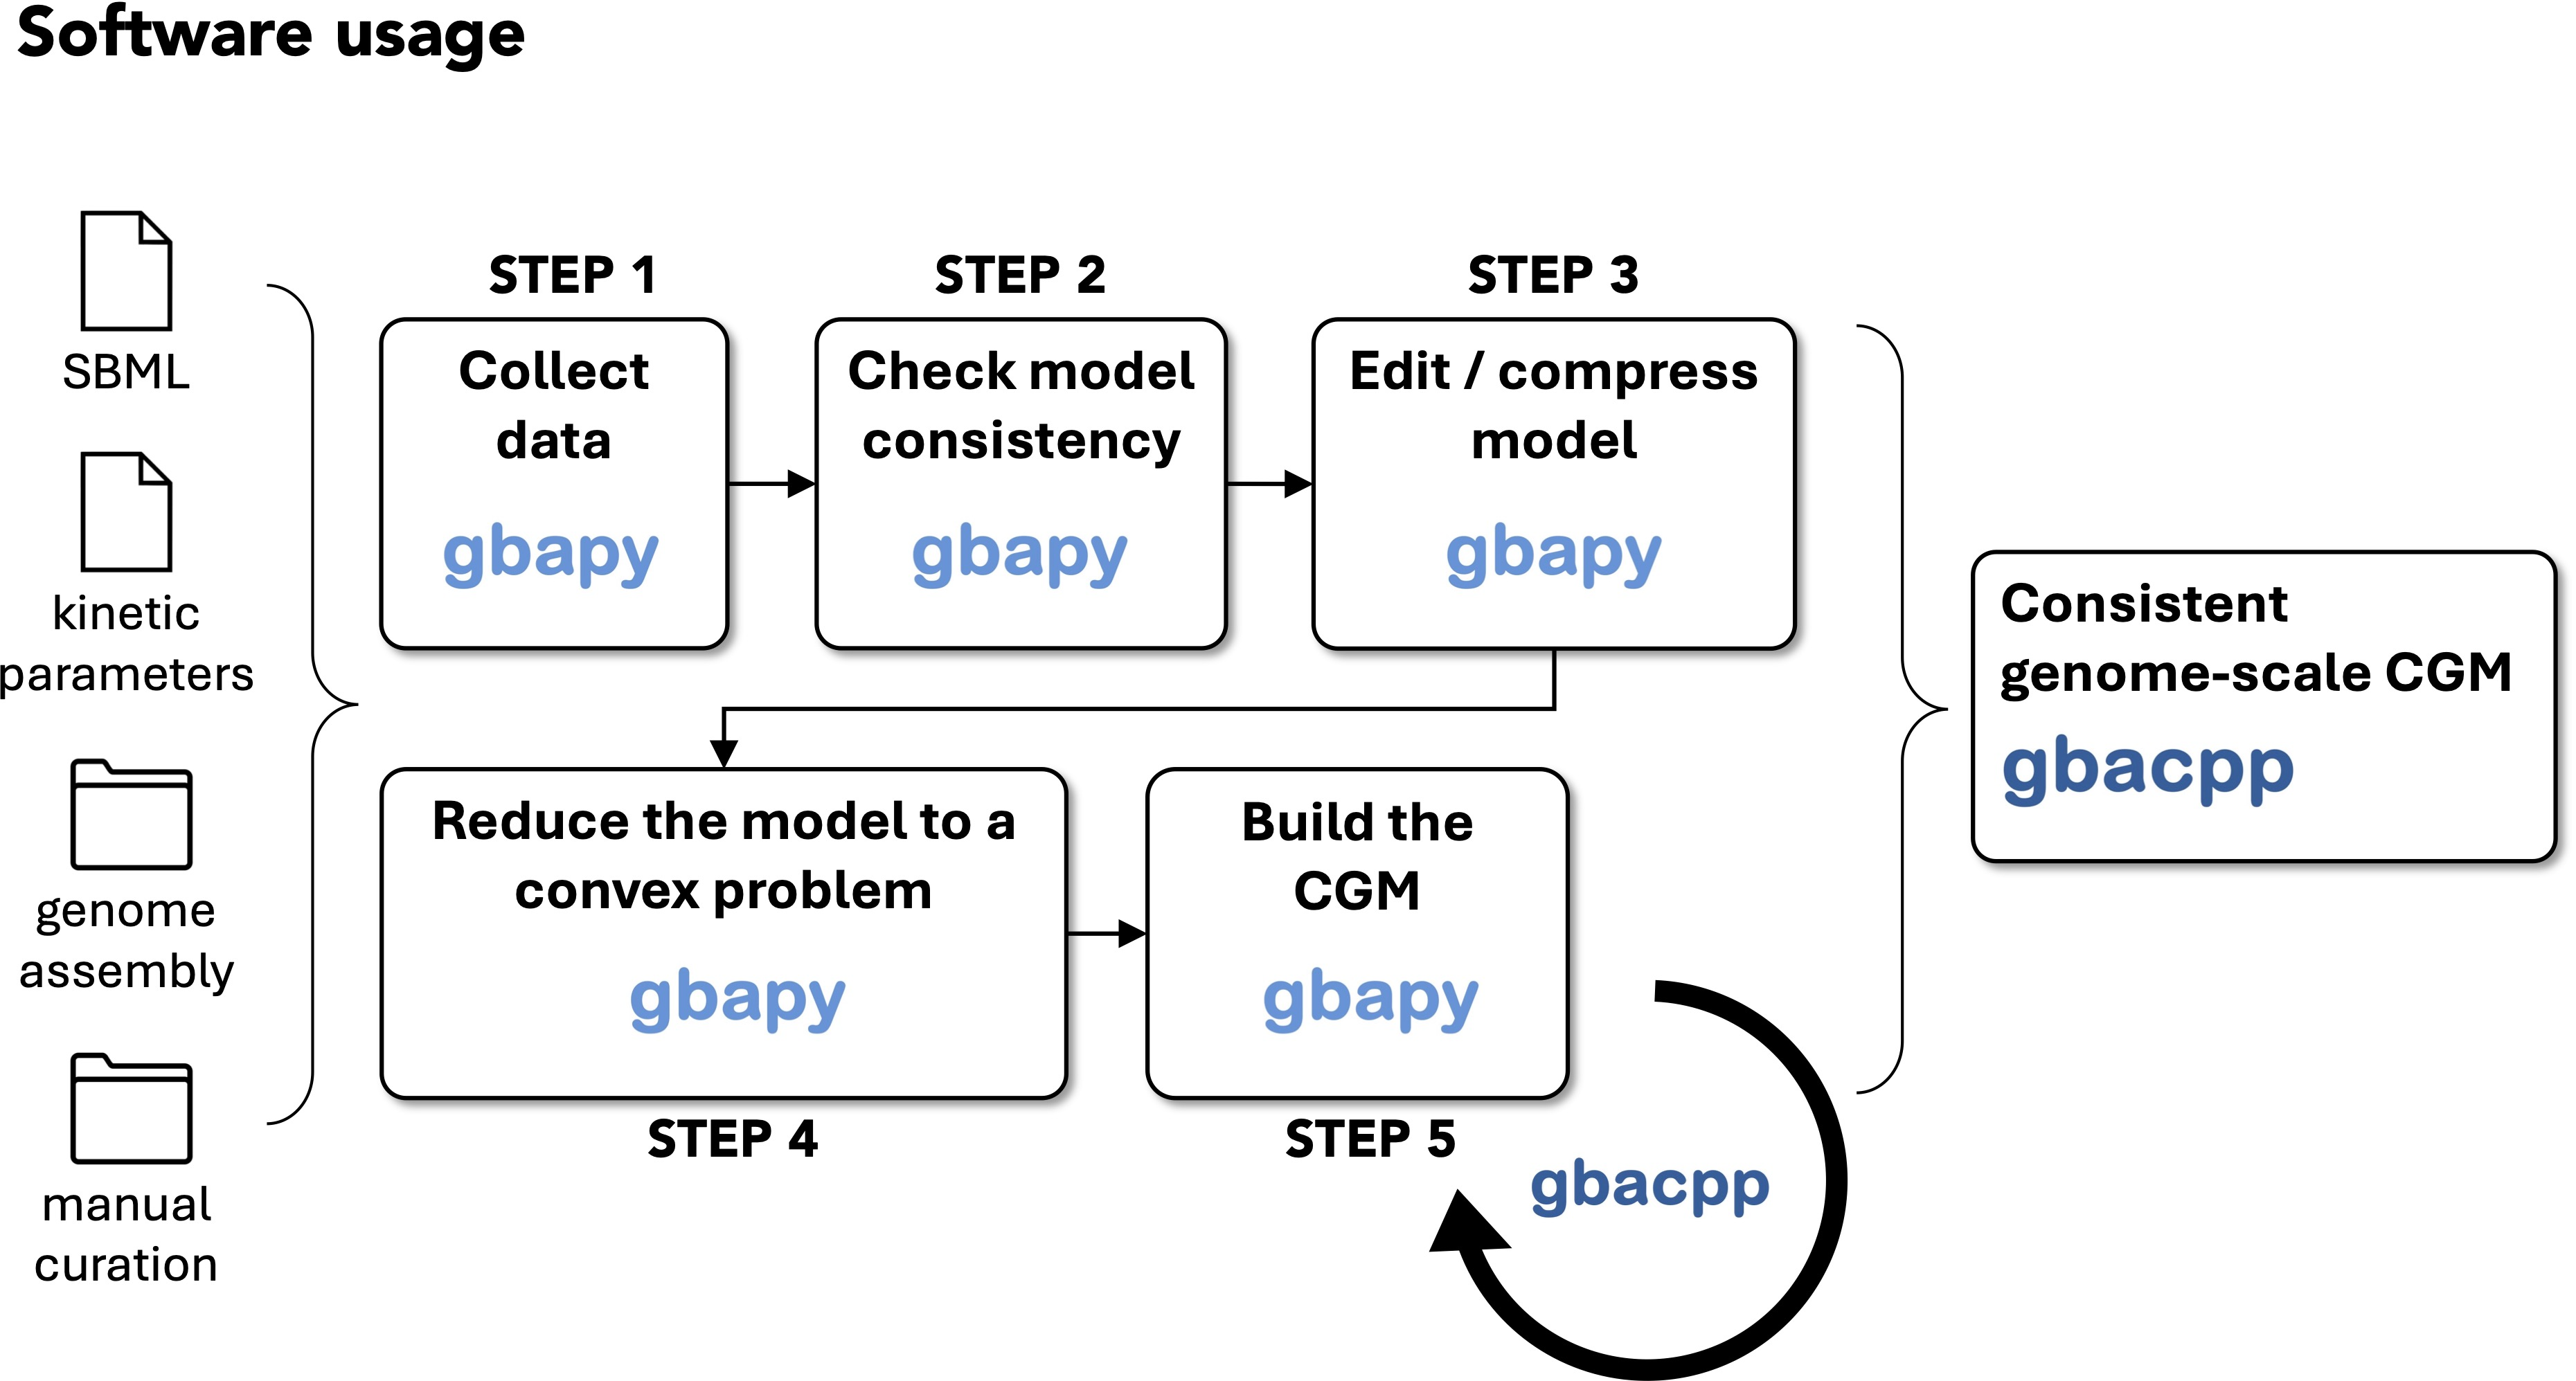

<strong>Figure 2.</strong> Software usage at each step of a genome-scale CGM construction.

</div>

# 4. A complete walkthrough tutorial to build a genome-scale CGM <a id="tutorial"></a>

A complete tutorial is available to guide the user towards a fully functional genome-scale CGM using <strong>gbapy</strong>.

The construction is based on the synthetic minimal cell JCVI-syn3A (see <a href="https://www.nature.com/articles/s41586-023-06288-x" target="_blank">Moger-Reischer et al. 2023</a>).

To ease the reading, the tutorial has been splitted into five parts, corresponding to the five main steps presented in Figure 1.
At each step, <strong>gbapy</strong> methods are presented, and detailed explanations and code are provided:

- [&#x2611; Tutorial 1: Collect data]()
- [&#x2611; Tutorial 2: Check and correct for inconsistencies in the model]()
- [&#x2611; Tutorial 3: Edit and compress the model]()
- [&#x2611; Tutorial 4: Reduce the model to a convex problem]()
- [&#x2611; Tutorial 5: Build the CGM]()

<br/>
<br/>

<div align="center" style="max-width:500px;display:block;margin:auto;">

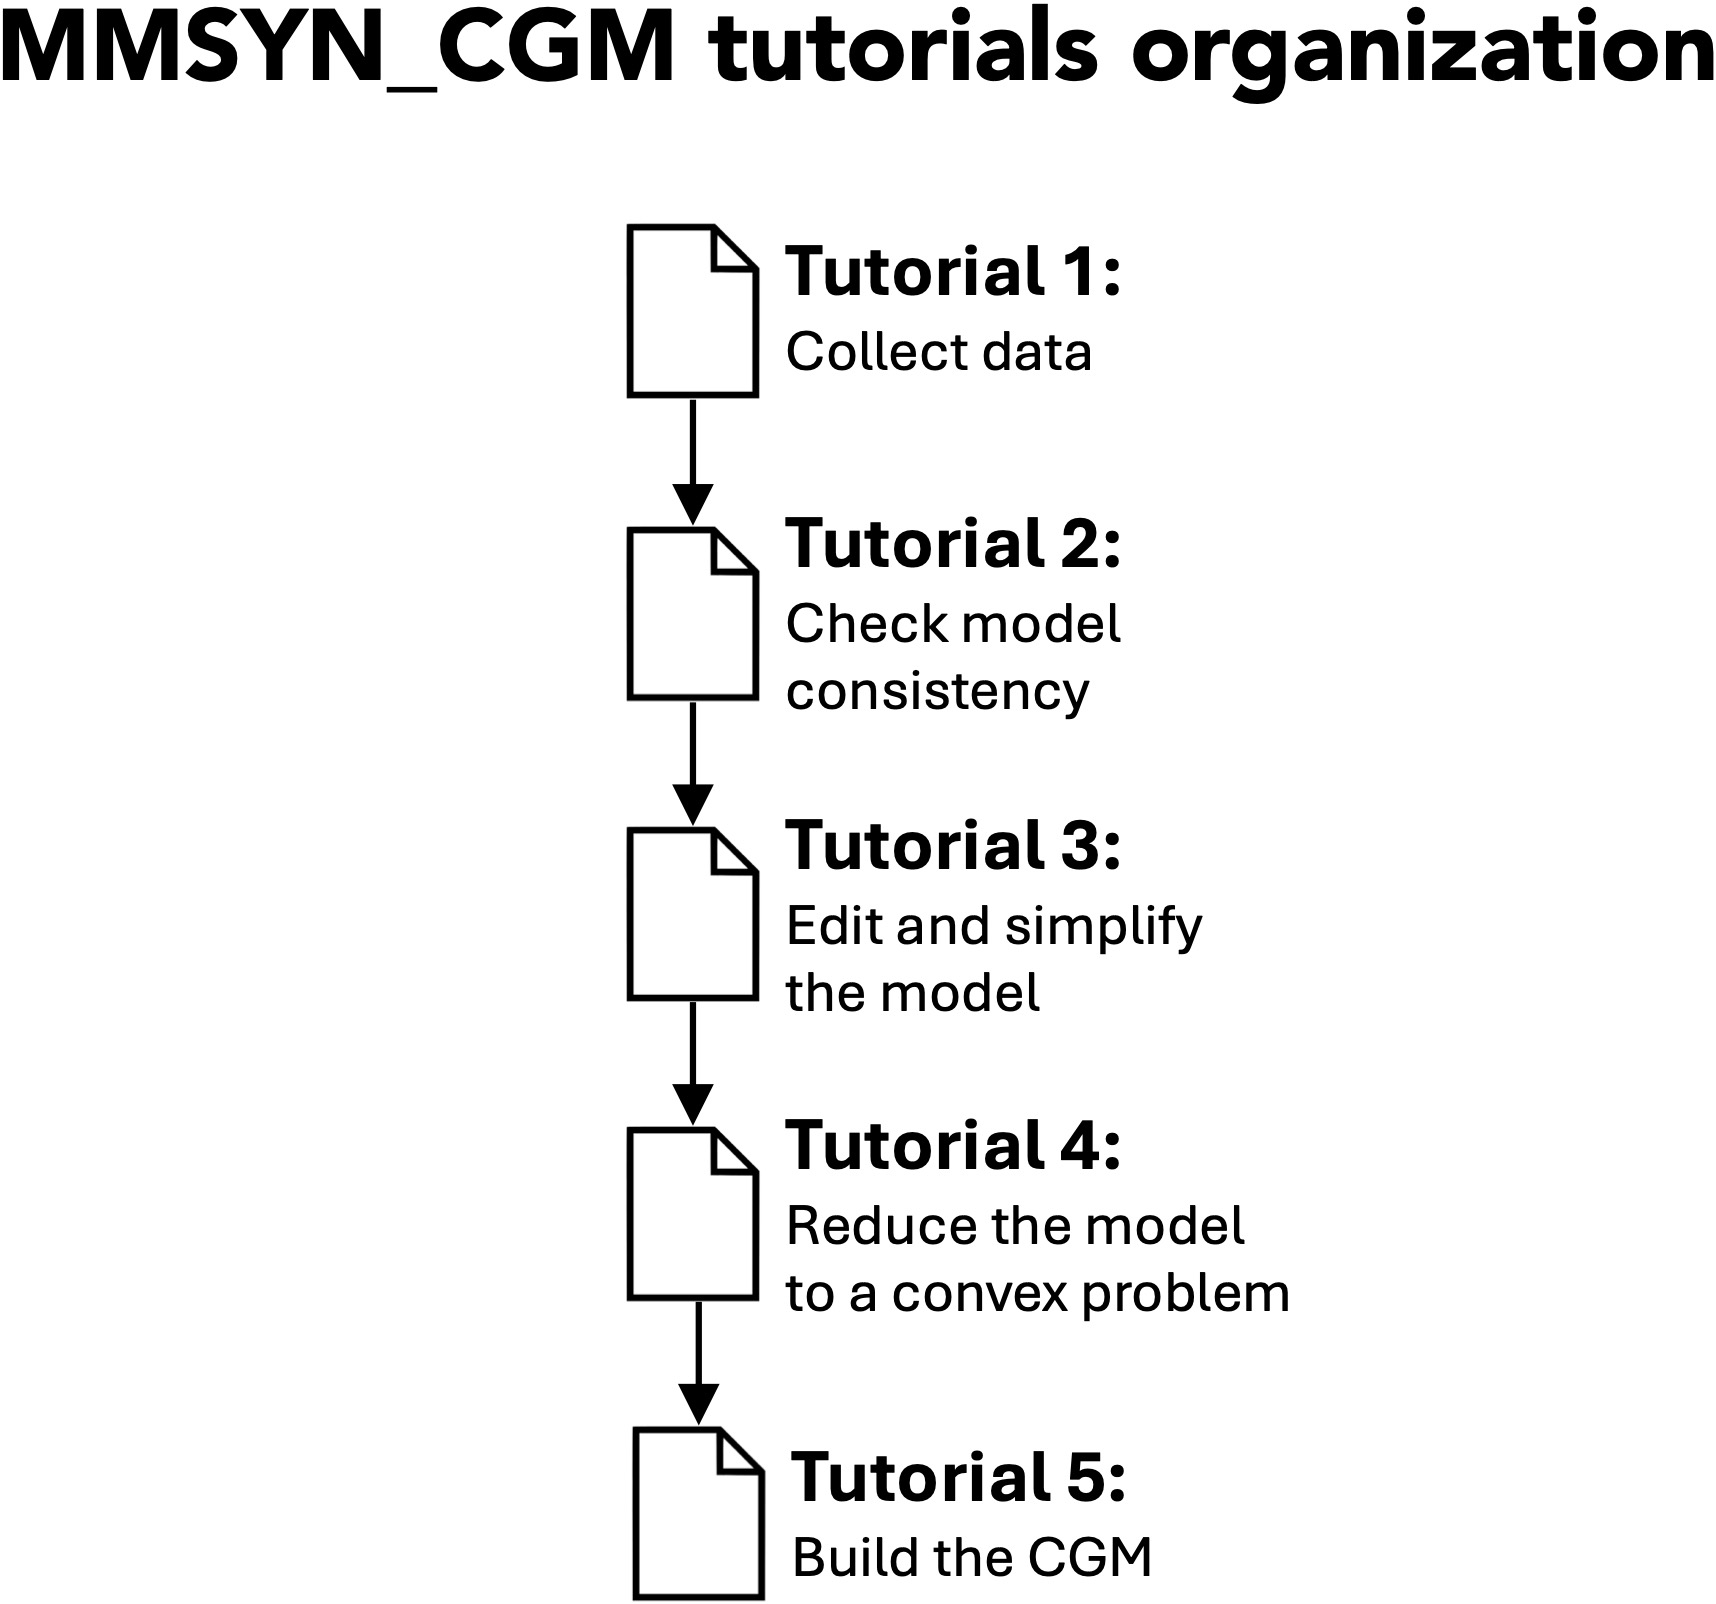

</div>